# Data Wrangling
## import work

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *


In [37]:
df = pd.DataFrame(pd.read_csv('hour1.csv'))

In [38]:
df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,7/3/2011,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
1,2,7/3/2011,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
2,3,8/27/2011,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2/25/2011,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
4,5,2/24/2012,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152


# Scrubbing


In [39]:
df.nunique()

instant       17379
dateday         731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
count           869
dtype: int64

In [41]:
display(df.loc[[]])

df.columns

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


Index(['instant', 'dateday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [42]:
df.isna().sum()

instant       0
dateday       0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [43]:
df.duplicated().sum()

0

# Renaming and revalueing


In [44]:
df.loc[df['holiday'] == 0, 'holiday'] = 'No'
df.loc[df['holiday'] == 1, 'holiday'] = 'Yes'

In [45]:
df.loc[df['workingday'] == 0, 'workingday'] = 'No'
df.loc[df['workingday'] == 1, 'workingday'] = 'Yes'

In [46]:
df.loc[df['season'] == 1, 'season'] = 'Winter'
df.loc[df['season'] == 2, 'season'] = 'Spring'
df.loc[df['season'] == 3, 'season'] = 'Summer'
df.loc[df['season'] == 4, 'season'] = 'Fall'

In [47]:
df.loc[df['weather'] == 1, 'weather'] = 'Clear'
df.loc[df['weather'] == 2, 'weather'] = 'Cloud'
df.loc[df['weather'] == 3, 'weather'] = 'Light'
df.loc[df['weather'] == 4, 'weather'] = 'Heavy'

In [48]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)

### denormalizing data

In [49]:
# Calculate unnormalized values and add them as new columns for actual temp
min_temp = -8
max_temp = 39
df['realtemp'] = df['temp'] * (max_temp - min_temp) + min_temp

# Calculate unnormalized values and add them as new columns for feel temp
min_temp1 = -16
max_temp1 = 50
df['realatemp'] = df['atemp'] * (max_temp1 - min_temp1) + min_temp1

df.head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,Light,0.80,0.7424,0.49,0.8507,181,177,358,29.60,32.9984
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,Light,0.80,0.7424,0.49,0.8507,74,107,181,29.60,32.9984
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,Light,0.64,0.5758,0.89,0.8358,2,14,16,22.08,22.0028
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,Clear,0.46,0.4545,0.41,0.8060,5,50,55,13.62,13.9970
4,5,2012-02-24,Winter,1,2,24,21,No,5,Yes,Clear,0.42,0.4242,0.35,0.8060,1,151,152,11.74,11.9972


In [50]:
# Create separate data frames for year 0 and year 1
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

In [51]:
display(df[df['year'] == 0]['casual'].sum())
display(df_year0['casual'].sum())

247252

247252

In [52]:
# plt.figure(figsize=(12,8))

# corr = df.corr()

# x= df['realtemp']
# y= df['casual']

# sns.heatmap(corr, 
#             annot=True, 
#             cmap="RdBu", 
#             fmt= '.1f',
#             xticklabels= x, yticklabels= y,
#             linewidths= 0.5,
#             linecolor= 'white')
# plt.title('Bike rentals')

# plt.show()

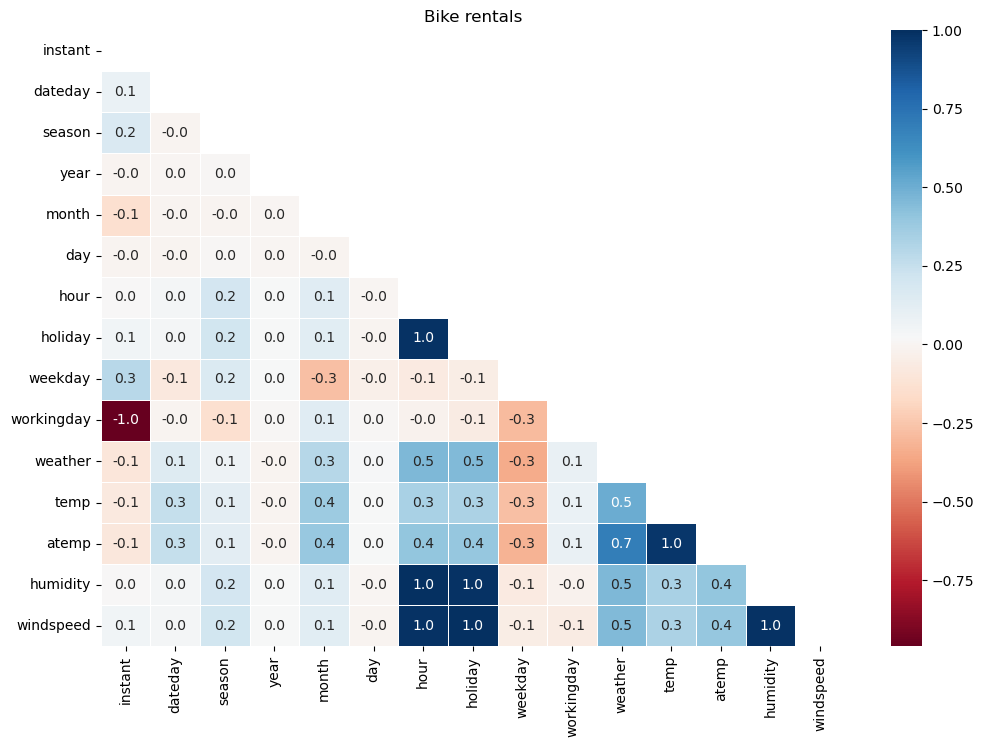

In [53]:
plt.figure(figsize=(12,8))


#giving the data 
corr = df.corr()

#giving the color
colormap = sns.color_palette("RdBu", 6)

#giving new list 
x = df.columns.drop(['count', 'realtemp', 'realatemp', 'registered', 'casual'])
y = df.columns.drop(['count', 'realtemp', 'realatemp', 'registered', 'casual'])

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            fmt= '.1f',
            xticklabels= x, yticklabels= y,
            mask=mask,
            linewidths= 0.5,
            linecolor= 'white')
plt.title('Bike rentals')

plt.show()

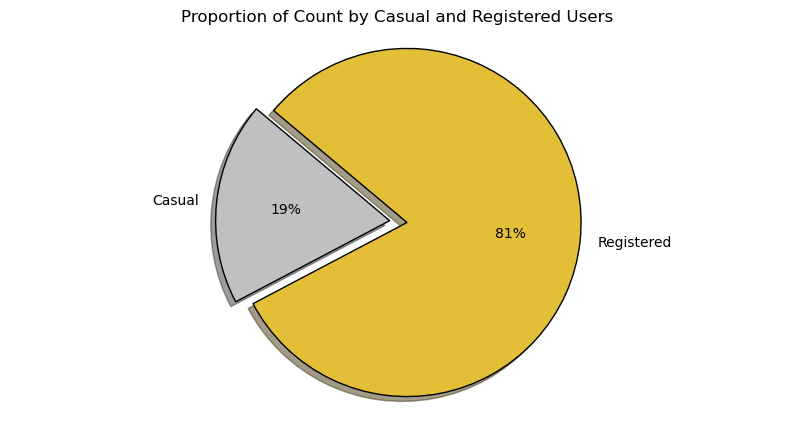

In [54]:
fig, axs = plt.subplots(figsize=(10, 5))

labels = ['Casual', 'Registered']
sizes = [df['casual'].sum(), df['registered'].sum()]
colors = ['silver', '#e2bf36']
explode = (0, 0.1) 

plt.pie(sizes, 
        # explode=explode, 
        labels=labels, 
        autopct='%1.0f%%',
        shadow=True, 
        colors=colors,
        explode=explode,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Proportion of Count by Casual and Registered Users')
plt.show()

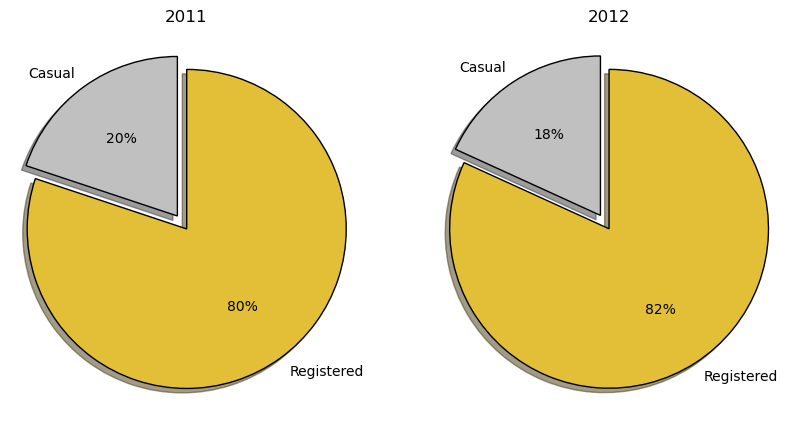

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for idx, c in enumerate(['red', 'blue']):
    labels = ['Casual', 'Registered']
    sizes = [df[df['year'] == idx]['casual'].sum(), df[df['year'] == idx]['registered'].sum()]
    colors = ['#C0C0C0', '#e2bf36']
    explode = (0.0, 0.1) 
    
    axs[idx].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.0f%%',
            shadow=True, 
            colors=colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black'})
    axs[idx].set_title(f'{2011 + idx}')
    axs[idx].axis('equal')

plt.show()

### comparing years

The column you selected: hour


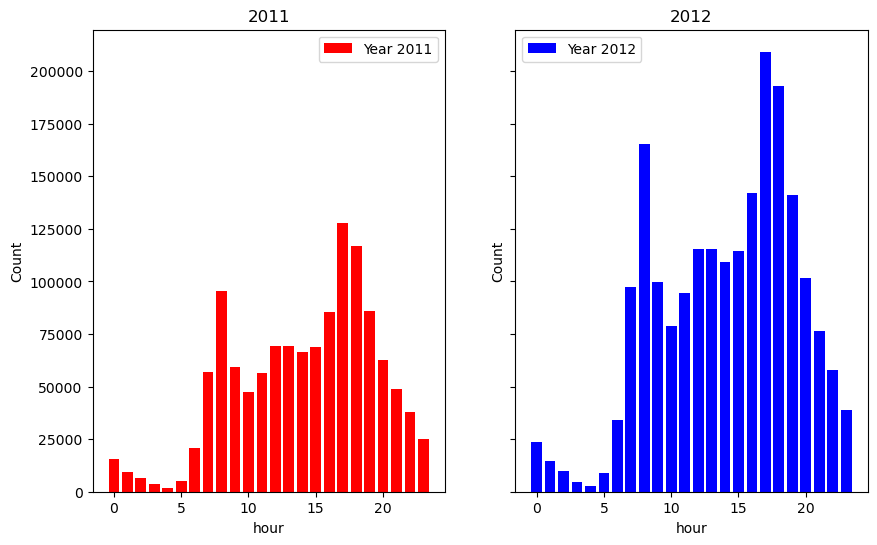

In [56]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

#input
wanted_input = input('Select: day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {wanted_input}')

for idx, c in enumerate(['red', 'blue']):
    x = []
    y = []

    for h in df[df['year'] == idx].groupby(wanted_input):
        x.append(h[0])
        y.append(h[1]['count'].sum())

    axs[idx].bar(x, y, color= c, label=f'Year {2011+idx}')
    axs[idx].set_title(2011 + idx)
    axs[idx].set_xlabel(wanted_input)
    axs[idx].set_ylabel('Count')
    axs[idx].legend()

plt.show()

### Bar plot with 2 bars 

The column you selected: season


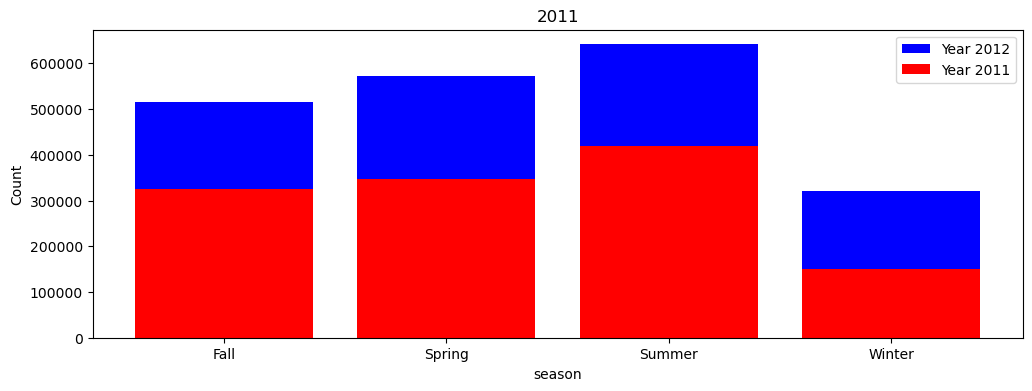

In [57]:
fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

#input
wanted_input = input('Select: day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {wanted_input}')

for idx, c in reversed(list(enumerate(['red', 'blue']))):
    x = []
    y = []

    for h in df[df['year'] == idx].groupby(wanted_input):
        x.append(h[0])
        y.append(h[1]['count'].sum())

    axs.bar(x, y, color= c, label=f'Year {2011+idx}')
    axs.set_title(2011 + idx)
    axs.set_xlabel(wanted_input)
    axs.set_ylabel('Count')
    axs.legend()

plt.show()

In [58]:
df[df['year'] == idx]['casual'].sum()

247252

### Very basic Bar plot

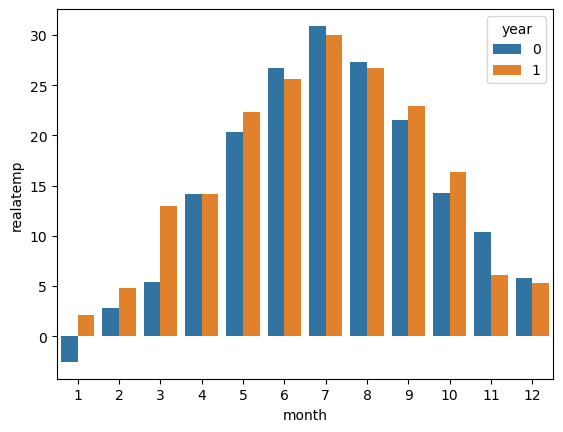

In [59]:
sns.barplot(x = 'month',
            y = 'realatemp',
            hue = 'year',
            ci = 0,
            data = df)
plt.show()

In [60]:
df.casual.head()

0    181
1     74
2      2
3      5
4      1
Name: casual, dtype: int64

### line graf with two columns

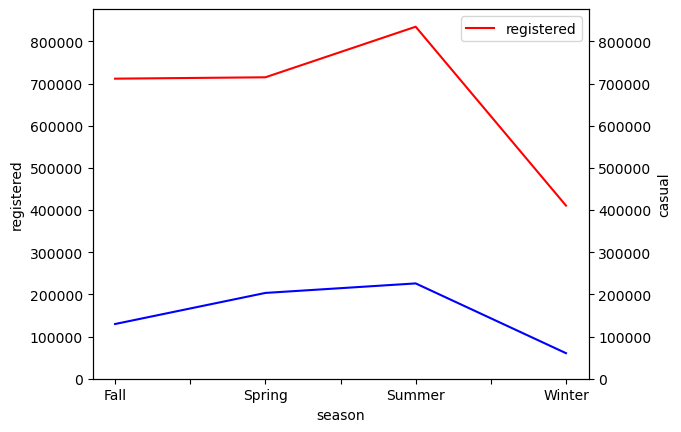

In [61]:
def reg_cas():
    fig = plt.figure() # Create matplotlib figure

    x_input = input()

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    df.groupby(x_input).registered.sum().plot(color='red', ax=ax, label= 'registered')
    df.groupby(x_input).casual.sum().plot(color='blue', ax=ax2, label= 'casual')

    ax.set_ylabel('registered')
    ax2.set_ylabel('casual')
    ax.legend(['registered' , 'casual'])
    
    # Set y-axis limits for both axes to the same range
    y_min = 0
    y_max = max(df.groupby(x_input).registered.sum().max(), df.groupby(x_input).casual.sum().max())*1.05
    ax.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    plt.show()

reg_cas()

### Simple shared Bar chart

(array([5485., 1569.,  864.,  276.,  160.,  132.,  127.,   80.,   28.,
          13.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

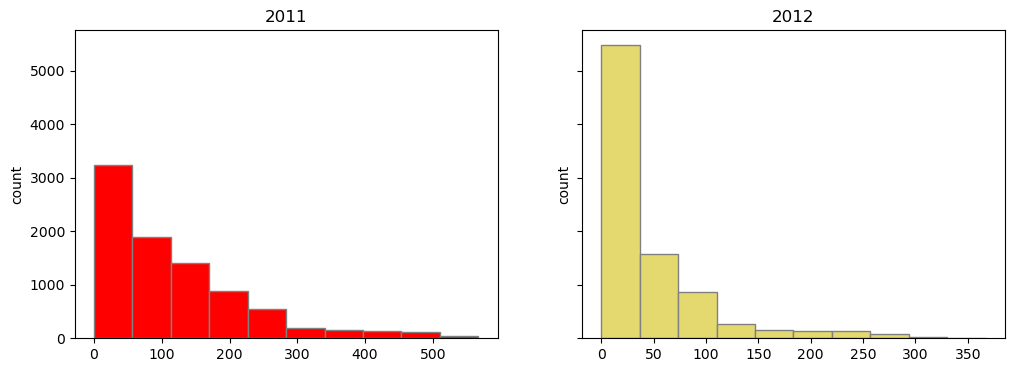

In [94]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

axs[0].set_title('registered')
axs[0].set_xlabel('weekday')
axs[0].set_ylabel('count')
axs[0].hist(df_year0['registered'], 
            color='red',
            edgecolor='grey')

axs[1].set_title('2012')
axs[1].set_xlabel('weekday')
axs[1].set_ylabel('count')
axs[1].hist(df_year1['casual'], 
            color='#E4d96f',
            edgecolor='grey')

<AxesSubplot:xlabel='realatemp', ylabel='Percent'>

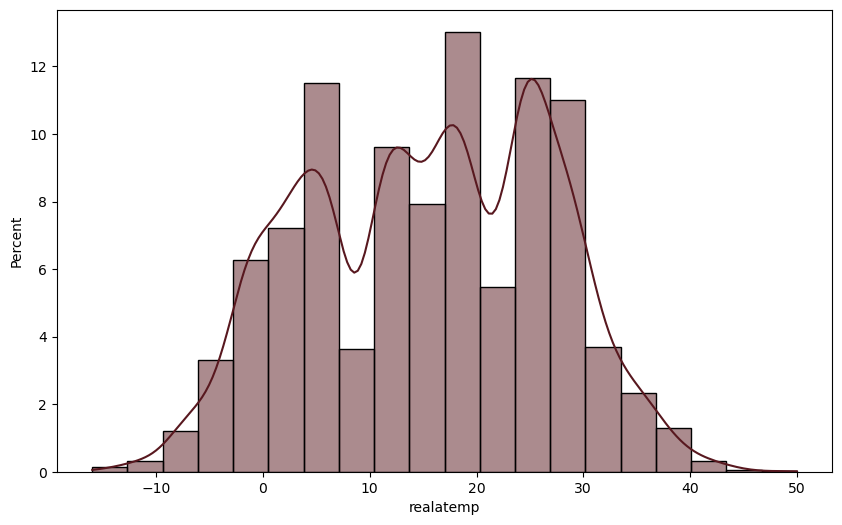

In [81]:
fig = plt.subplots( figsize = (10, 6))

sns.histplot(x = df['realatemp'],
            bins = 20,
            kde = True,
            cbar = True,
            stat = 'percent',
            color ="#58181F")

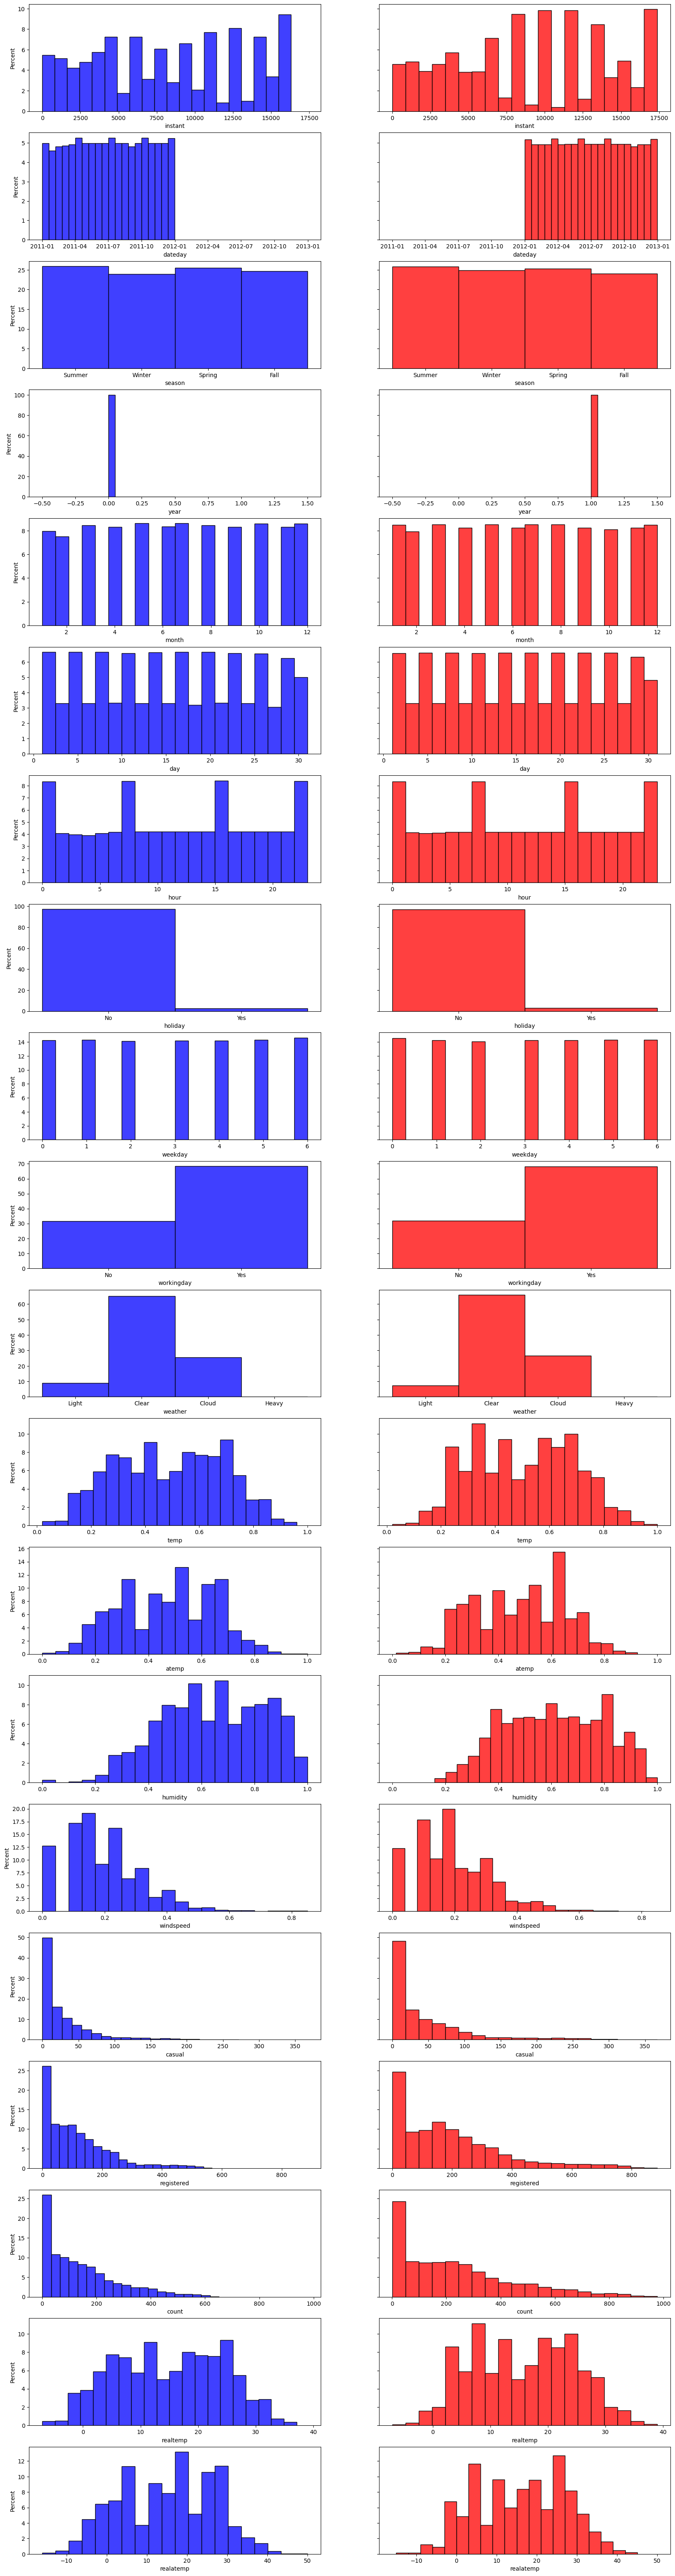

In [88]:
fields=list(df)


fig, axes = plt.subplots(len(fields), 2, sharex="row", sharey="row", tight_layout=False, figsize = (len(fields), 2*40))
h=0
for field in fields:
     sns.histplot(ax = axes[h][0], x = df_year0[field],
                    bins = 20,
                    kde = False,
                    cbar = False,
                    stat = 'percent',
                    color ="Red")
     sns.histplot(ax = axes[h][1], x = df_year1[field],
                    bins = 20,
                    kde = False,
                    cbar = True,
                    stat= 'percent',
                    color="Blue")
     h+=1

The column you selected: hour


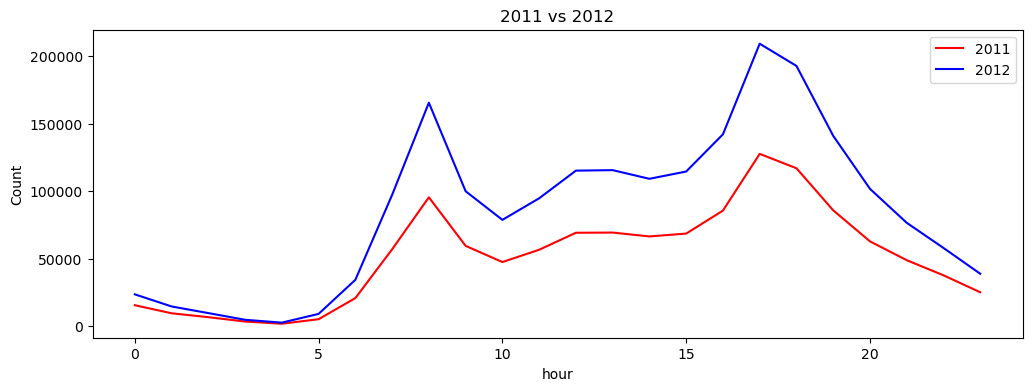

In [63]:
fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

valid_inputs = ['casual', 'registered', 'day', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'season', 'realatemp', 'realtemp']
wanted_input = input(f"Select one of the following: {', '.join(valid_inputs)}\n")

if wanted_input not in valid_inputs:
    print(f"{wanted_input} is an invalid input. Please try again.")
else:
    print(f"The column you selected: {wanted_input}")
    for idx, c in enumerate(['red', 'blue']):
        x = []
        y = []

        for h in df[df['year'] == idx].groupby(wanted_input):
            x.append(h[0])
            y.append(h[1]['count'].sum())

        axs.plot(x, y, color= c, label = f'{2011+idx}')
        axs.set_title('2011 vs 2012')
        axs.set_xlabel(wanted_input)
        axs.set_ylabel('Count')
        axs.legend()

plt.show()

In [64]:
df[df['year'] == 0].head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,realtemp,realatemp
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,Light,0.80,0.7424,0.49,0.8507,181,177,358,29.60,32.9984
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,Light,0.80,0.7424,0.49,0.8507,74,107,181,29.60,32.9984
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,Light,0.64,0.5758,0.89,0.8358,2,14,16,22.08,22.0028
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,Clear,0.46,0.4545,0.41,0.8060,5,50,55,13.62,13.9970
5,6,2011-02-15,Winter,0,2,15,1,No,2,Yes,Clear,0.30,0.2424,0.42,0.7761,0,5,5,6.10,-0.0016


## Making graph def

In [65]:
valid_inputs = df.columns

The Splitter you selected: year
The Column you selected: month


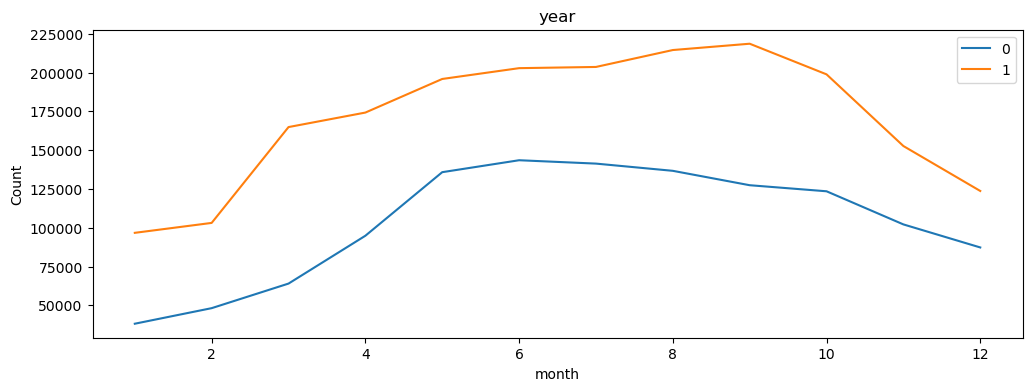

In [95]:
def paint_old(splitter, catagory):

    fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))

    #this converts all words in a column into a number
    cat= df[splitter].unique()

    for idx, c in enumerate(cat):
        x = []
        y = []
        for h in df[df[splitter] == cat[idx]].groupby(catagory):
            x.append(h[0])
            y.append(h[1]['count'].sum())
        axs.plot(x, y, label = f'{splitter} {idx}')
        axs.set_title(splitter)
        axs.set_xlabel(catagory)
        axs.set_ylabel('Count')
        if len(cat) < 13:
            axs.legend(cat)
    plt.show()

valid_inputs = df.columns
wanted_input = input(f"Select a Splitter from the following: {', '.join(valid_inputs)}\n")
wanted_input1 = input(f"Select a Catagory from the following: {', '.join(valid_inputs)}\n")

if wanted_input not in valid_inputs:
    print("Invalid input. Please try again.")
elif wanted_input1 not in valid_inputs:
    print("Invalid second input. Please try again.")
else:
    print(f"The Splitter you selected: {wanted_input}")
    print(f"The Column you selected: {wanted_input1}")
    paint_old(wanted_input, wanted_input1)


The Splitter you selected: year
The Column you selected: season


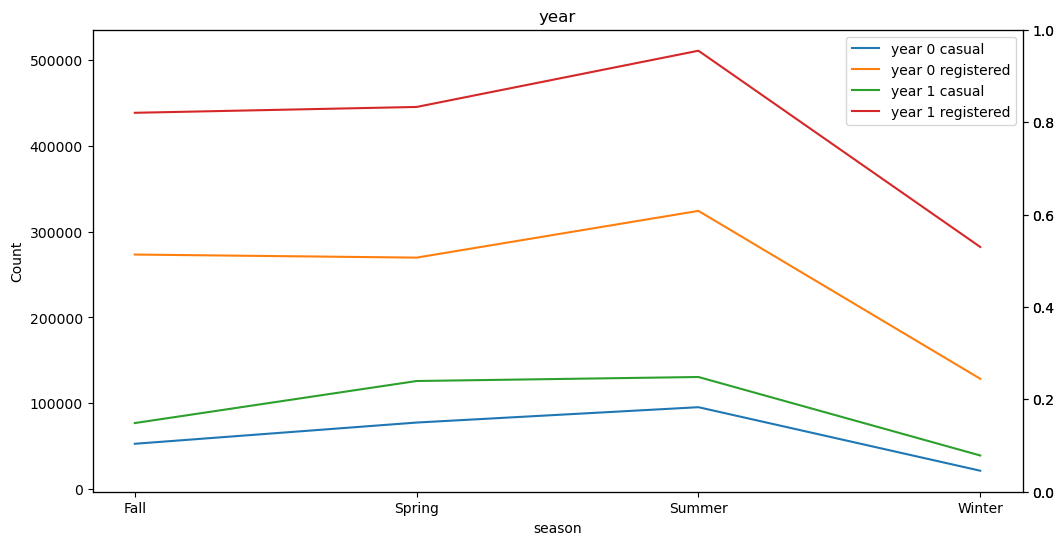

In [89]:
def paint(splitter, catagory, combine=True):
    fig, axs = plt.subplots(1, sharey=True, figsize=(12, 6))

    #this converts all words in a column into a number
    cat= df[splitter].unique()

    for idx, c in enumerate(cat):
        x = []
        y = []
        c = []
        r = []
        for h in df[df[splitter] == cat[idx]].groupby(catagory):
            x.append(h[0])
            y.append(h[1]['count'].sum())
            c.append(h[1]['casual'].sum())
            r.append(h[1]['registered'].sum())
        if combine == True:
            axs.plot(x, y, label = f'{splitter} {idx}')
            axs.set_title(splitter)
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')
        else:
            axs.plot(x, c, label = f'{splitter} {idx} casual')
            axs2 = axs.twinx()
            axs.plot(x, r, label = f'{splitter} {idx} registered')
            axs.set_title(splitter)
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')           
        if len(cat) < 13:
            axs.legend()
    plt.show()

valid_inputs = df.columns
splitter_input = input(f"Select a Splitter from the following: {', '.join(valid_inputs)}\n")
column_input = input(f"Select a Catagory from the following: {', '.join(valid_inputs)}\n")

if splitter_input not in valid_inputs:
    print("Invalid input. Please try again.")
elif column_input not in valid_inputs:
    print("Invalid second input. Please try again.")
else:
    print(f"The Splitter you selected: {splitter_input}")
    print(f"The Column you selected: {column_input}")
    paint(splitter_input, column_input, False)

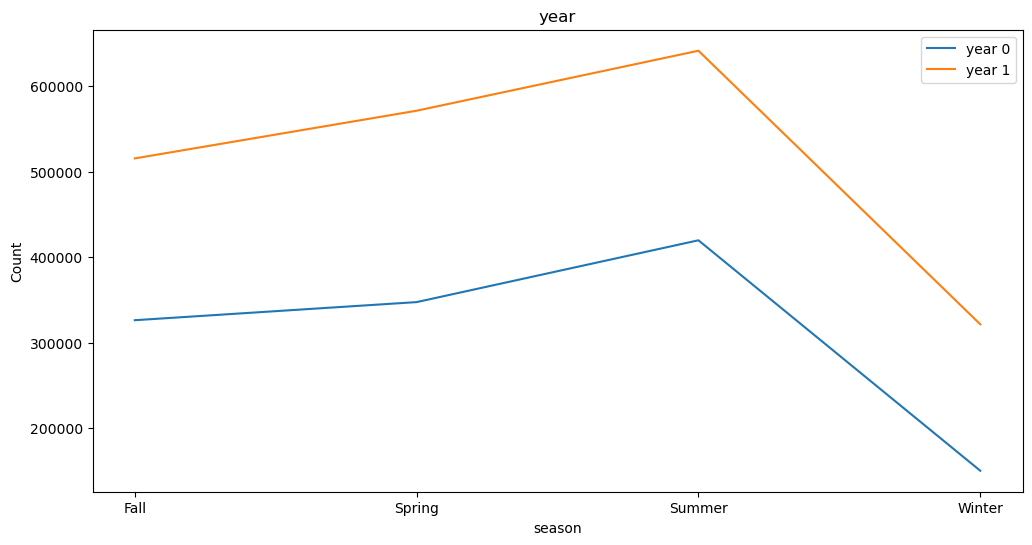

In [90]:
paint('year', 'season', True)

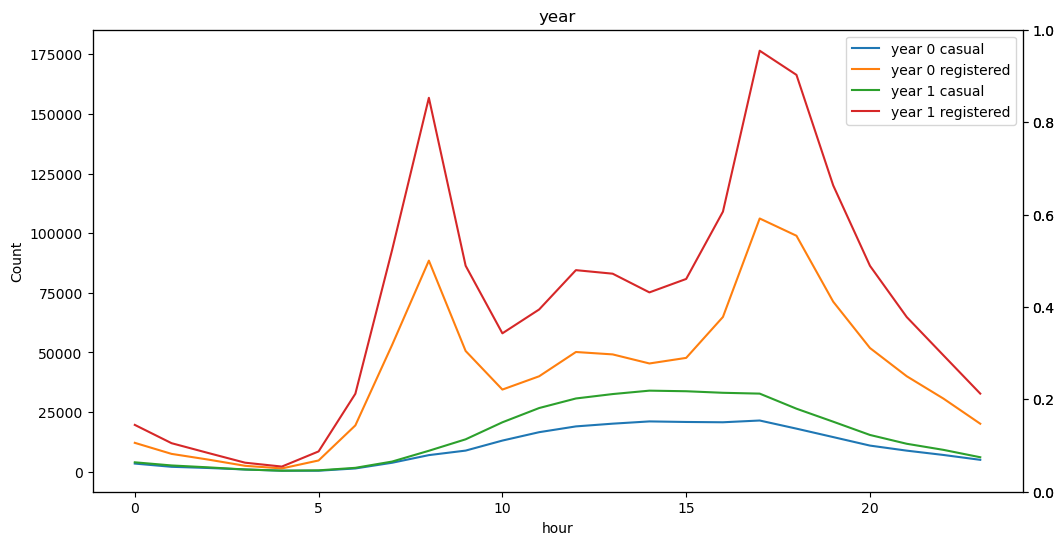

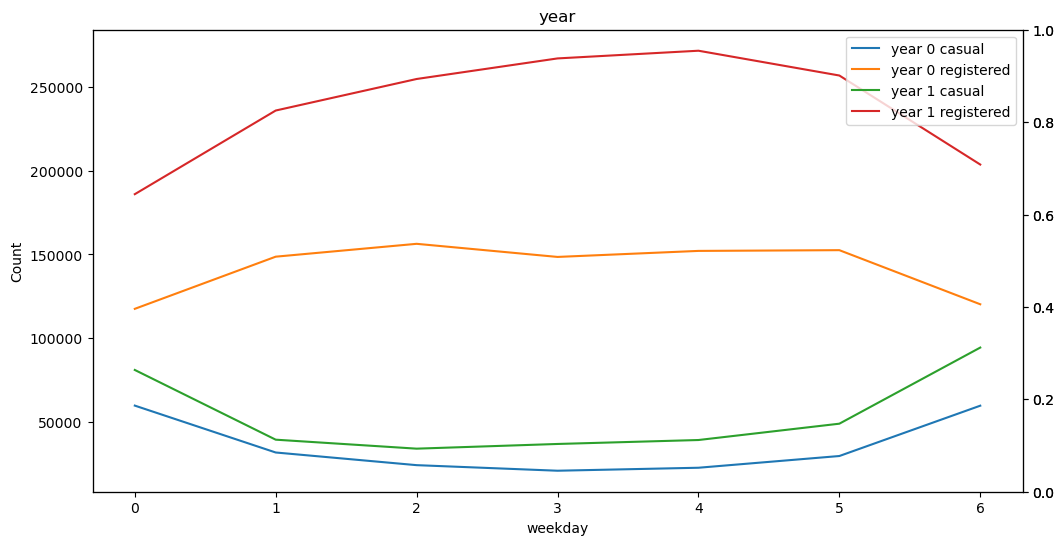

In [96]:
paint('year', 'hour', input('Combine = False || Split = True'))
paint('year', 'weekday', input('Combine = False || Split = True'))

### Don't Touch

In [70]:
# l_list = df.columns.drop(['dateday', 'instant', 'count', 'temp', 'atemp'])

# for x in l_list:
#     print(x)
#     l_list = list(filter(lambda t: x != t, l_list))
#     print(l_list)

#     for y in l_list:
#         paint(x, y)

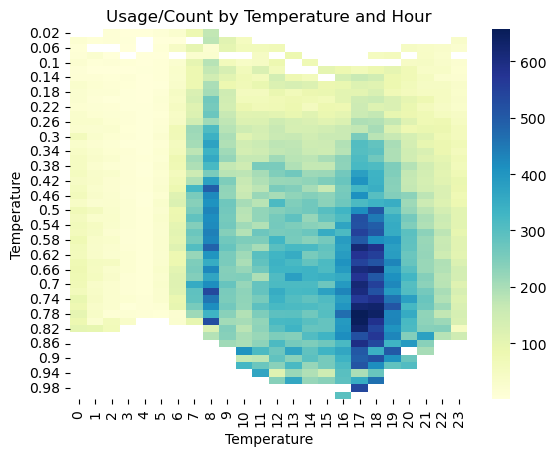

In [98]:
# Create a pivot table with temperature as the index and hour as the columns
pivot_table = df.pivot_table(index='temp', columns='hour', values='count')

# Plot the heatmap using seaborn
sns.heatmap(pivot_table, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Temperature')
plt.title('Usage/Count by Temperature and Hour')

# Display the plot
plt.show()

### Observations
4 am is the least used time.
January and Febuary have the lowest usage
Registarted users use most during rush hour and reduce their usage in the weekend
Causal users you it the most in the afternoon and increase their usage in the weekend
